In [1]:
import os
import numpy as np
import torch
import h5py as h5

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from torch_harmonics.plotting import imshow_sphere, plot_sphere

from torch_harmonics.examples import Stanford2D3DSDownloader,StanfordSegmentationDataset, StanfordDepthDataset

In [13]:
data_dir = "../examples/data/2D3DS"
os.makedirs(data_dir, exist_ok=True)

# 2D3DS download & dataset initialization
downloader = Stanford2D3DSDownloader(base_url="https://cvg-data.inf.ethz.ch/2d3ds/no_xyz/", local_dir=str(data_dir))
dataset_file = downloader.prepare_dataset([("area_1_no_xyz.tar", "area_1")], "stanford_2d3ds_dataset_ds16.h5")

Dataset file at ../examples/data/2D3DS/stanford_2d3ds_dataset_ds16.h5 already exists. Skipping download and conversion. If you want to create a new dataset file, delete or rename the existing file.


In [3]:
h5file = h5.File(os.path.join(data_dir, "stanford_2d3ds_dataset.h5"), "r")

inp = np.transpose(h5file["rgb"][0, ...], (1,2,0))
tar = h5file["semantic"][0, ...]
dep = h5file["depth"][0, ...]
class_labels = h5file["class_labels"]
class_histogram = h5file["class_histogram"]
num_classes = len(class_labels)

In [4]:
class_labels
#class_labels[0] = "unknown"

<HDF5 dataset "class_labels": shape (14,), type "|O">

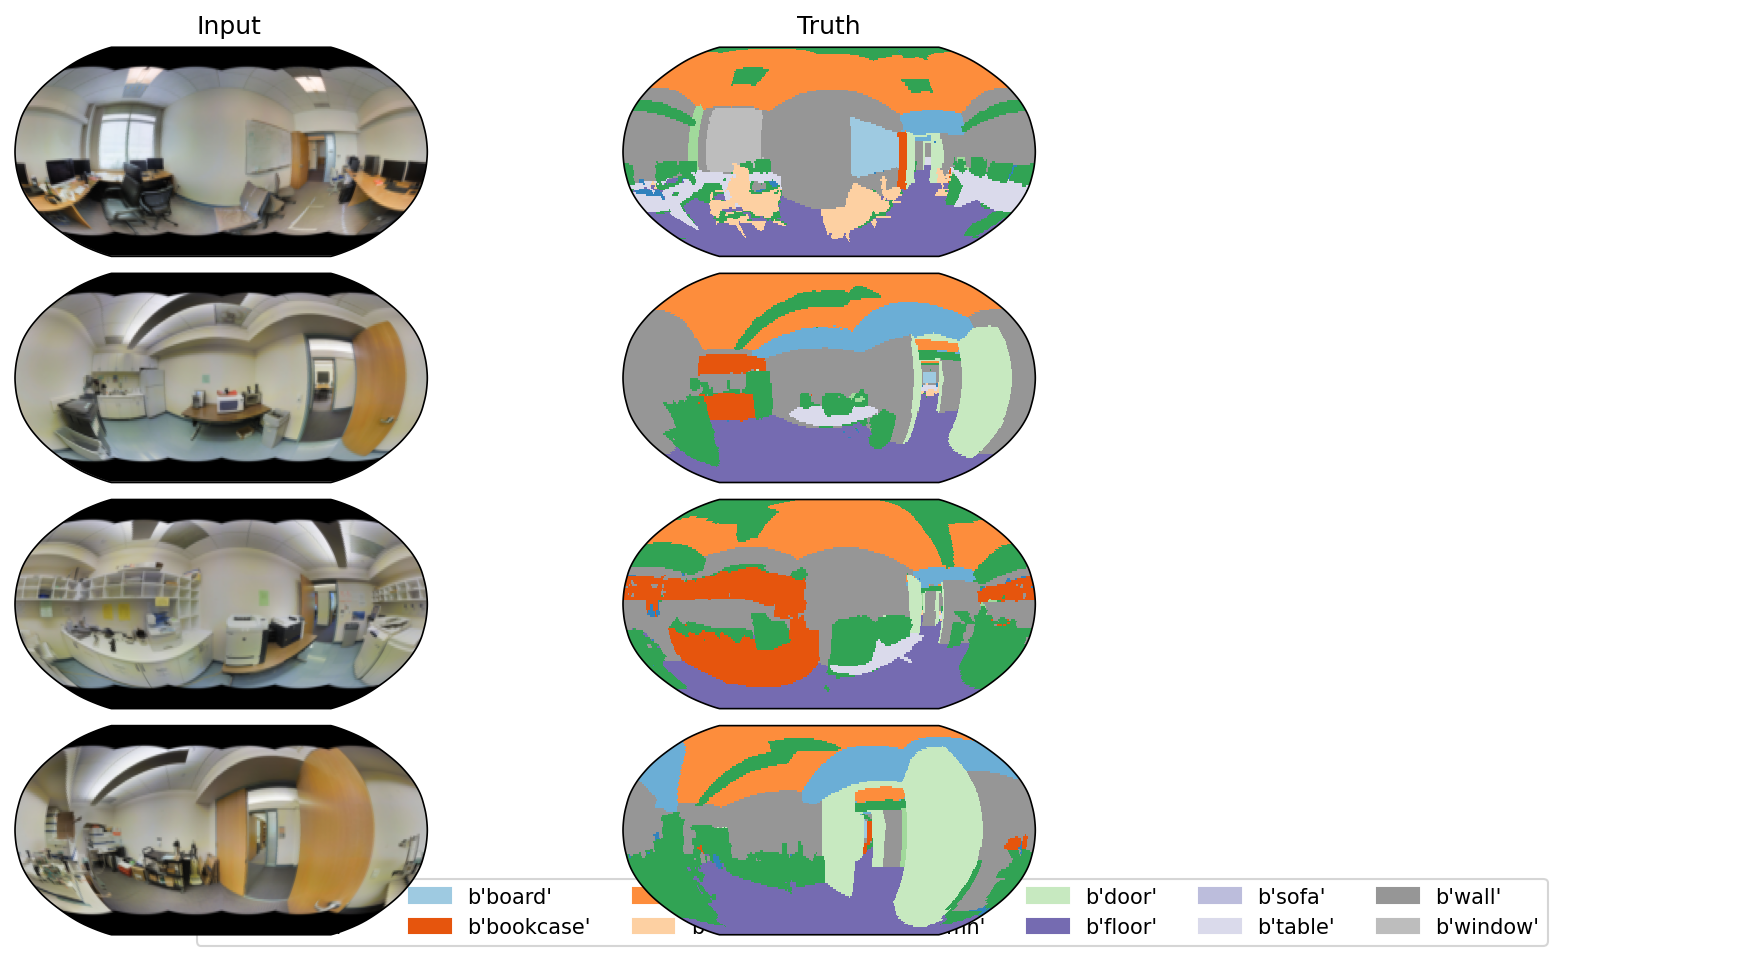

In [5]:
num_samples = 4

fig = plt.figure(layout="constrained", figsize=(12, 6), dpi=150)
subfigs = fig.subfigures(num_samples, 3, wspace=0.04)

cmap = mpl.colormaps["tab20c"]

for isample in range(num_samples):

    inp = np.transpose(h5file["rgb"][isample, ...], (1,2,0))
    tar = h5file["semantic"][isample, ...]

    # do the plotting
    imshow_sphere(inp, fig=subfigs[isample, 0])
    plot_sphere(tar / num_classes, fig =subfigs[isample, 1], cmap=cmap, vmin=0.0, vmax=1.0)

    legend_list = []
    for cidx, cname in enumerate(class_labels):
        legend_list.append(mpatches.Patch(color=cmap(cidx / num_classes), label=cname))

# Add column labels
column_labels = ["Input", "Truth"]
for j, label in enumerate(column_labels):
    fig.text((j + 0.5) / 3, 1.03, label, va="top", ha="center", fontsize="large")

fig.legend(loc="lower center", handles=legend_list, ncol=7)

In [6]:
class_histogram

<HDF5 dataset "class_histogram": shape (14,), type "<f4">

In [7]:
class_labels = [cl.decode("utf-8") for cl in class_labels]

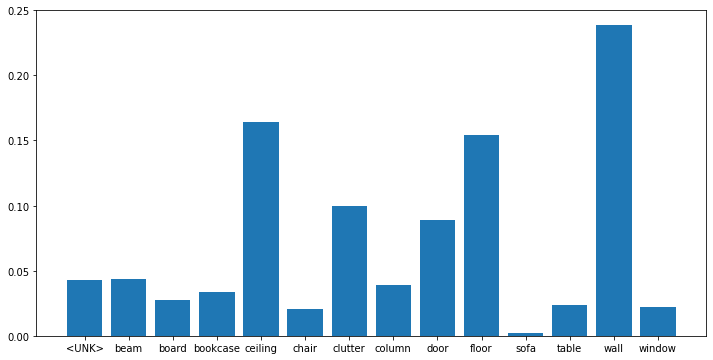

In [8]:
fig = plt.figure(figsize=(12,6))
plt.bar(class_labels, class_histogram)
plt.show()

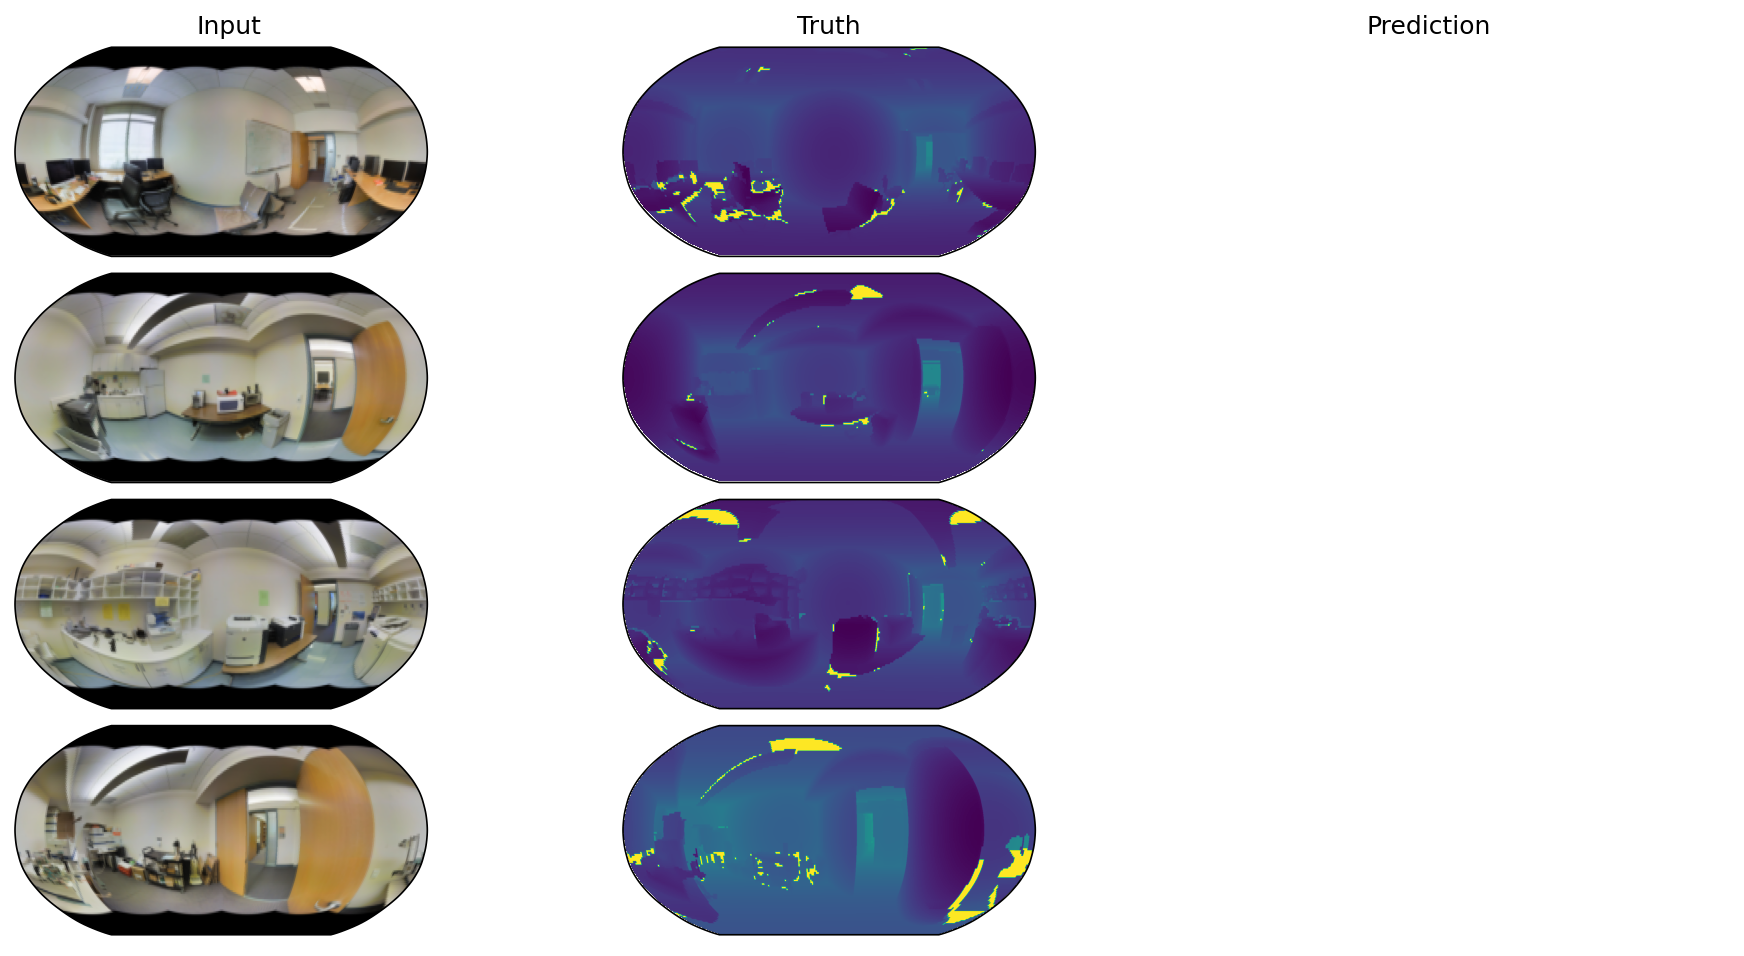

In [20]:
num_samples = 4

fig = plt.figure(layout="constrained", figsize=(12, 6), dpi=150)
subfigs = fig.subfigures(num_samples, 3, wspace=0.04)

cmap = mpl.colormaps["tab20c"]

for isample in range(num_samples):

    inp = np.transpose(h5file["rgb"][isample, ...], (1,2,0))
    inp[0:20, :, :] = [1, 1, 1]
    inp[-20:, :, :] = [1, 1, 1]
    tar = h5file["depth"][isample, ...]
    mask = h5file["depth_mask"][isample, ...]

    # do the plotting
    imshow_sphere(inp, fig=subfigs[isample, 0])
    imshow_sphere(np.log(tar)*mask, fig =subfigs[isample, 1], cmap="viridis")

# Add column labels
column_labels = ["Input", "Truth", "Prediction"]
for j, label in enumerate(column_labels):
    fig.text((j + 0.5) / 3, 1.03, label, va="top", ha="center", fontsize="large")



Max:  0.99998474
Min:  0.00077819824
Mean log depth: 0.01618235744535923
Std log depth: 0.011442126706242561


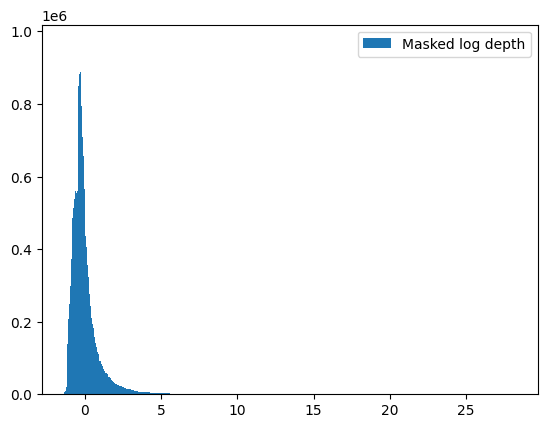

In [21]:
min_depth = h5file["min_depth"][...]
max_depth = h5file["max_depth"][...]
mean_depth = h5file["mean_depth"][...]
std_depth = h5file["std_depth"][...]

depth = h5file["depth"][...]
mask_depth = h5file["depth_mask"][...]

print("Max: ", depth.max())
print("Min: ", depth.min())
m = np.log(1 + depth) * mask_depth
m = m[m!=0]
print(f"Mean log depth: {np.nanmean(m)}")
print(f"Std log depth: {np.nanstd(m)}")
m = (m - np.mean(m)) / np.std(m)

counts, bin_edges, _ = plt.hist(m.flatten(), 1000, label="Masked log depth")
plt.legend()
#for c,b in zip(counts, bin_edges):
#    print(c, b)
#print(f"Min log depth: {np.nanmin(res)}")
#print(f"Max log depth: {np.nanmax(res)}")
#print(f"Mean log depth: {np.nanmean(res)}")
#print(f"Std log depth: {np.nanstd(res)}")


In [40]:
min_rgb = h5file["min_rgb"][...]
max_rgb = h5file["max_rgb"][...]
mean_rgb = h5file["mean_rgb"][...]
std_rgb = h5file["std_rgb"][...]

print(f"Min rgb: {min_rgb}")
print(f"Max rgb: {max_rgb}")
print(f"Mean rgb: {mean_rgb}")
print(f"Std rgb: {std_rgb}")

Min rgb: [0. 0. 0.]
Max rgb: [0.84705883 0.8        0.81960785]
Mean rgb: [0.49857375 0.48026854 0.42882833]
Std rgb: [0.38514462 0.38509178 0.38594526]
